In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
#from matplotlib.patches import Rectangle
import pandas as pd
import numpy as np
from thisActivity import *
from great_tables import GT, md, style, loc

plt.rcParams.update({'font.size':18})

# Euler's method for determining position and velocity given acceleration

Givens numerical values for:
- An initial time: $t_0$ (usually, we pick 0 sec)
- An initial position: $x_0$ (Depends on the problem, will *always* be given)
- An initial velocity: $v_0$ (Depends on the problem, will *always* be given)
- A known acceleration function $a(t)$ (Depends on the problem, will be given for now)

In general, our goal is to make a table full of numbers that allows you to fill in the table below:

|t       |x       |v       |a         |
|--------|--------|--------|----------|
|$t_0$   |$x_0$   |$v_0$   |$a_0$     |
|$t_1$   |$x_1$   |$v_1$   |$a_1$     |
|$t_2$   |$x_2$   |$v_2$   |$a_2$     |
|$t_3$   |$x_3$   |$v_3$   |$a_3$     |
|$t_4$   |$x_4$   |$v_4$   |$a_4$     |
|...     |...     |...     |...       |


## Step 1: Choose an appropriate time step $\delta t$
Literally, just pick one (at least to start out).

## Step 2: Fill in the first line of the table above.  
You'll need to plug the initial time into your acceleration function to get the initial acceleration.
$$
a(t_0) = a_0
$$

## Step 3: Calculate the *future* time, position, velocity, and acceleration:

$$
\begin{align*}
t_1 &= t_0 + \delta t \\
x_1 &= x_0 + v_0 \delta t \\
v_1 &= v_0 + a_0 \delta t \\
a_1 &= a(t_1) \\
\end{align*}
$$


## Step 4: Repeat step 3 until you are done
Usually, you are looking for a certain final time, or are given a condition when you should stop calculating.

In general, you calculate the next element based off of the previous elements
$$
\begin{align*}
t_{j+1} &= t_j + \delta t \\
x_{j+1} &= x_j + v_j \delta t \\
v_{j+1} &= v_j + a_j \delta t \\
a_{j+1} &= a(t_{j+1}) \\
\end{align*}
$$
This lets you determine the next row of your table based on the previous row of the table.

## Motion of an accelerating object
Suppose you have an object moving in 1D with an acceleration given by the following function of time:
$$
a(t) = \left(1\frac{\text{m}}{\text{s}^2}\right) e^{-\frac{t}{1 \text{s}}}
$$
You also know that at $t=0$ the position is $x_i=0$ m and the velocity is $v_i=0 \frac{\text{m}}{\text{s}}$. We want to know where, and how fast, the object is moving at $t=5$ s.

1. Carry out the following procedure to make this prediction. You can start by working with paper and pencil, but you will want to transition this calculation to code.
    1. Numerically predict the velocity and position at $t=1$ s.
    2. Given your previous prediction, now predict the velocity and position at $t=2$ s.
    3. Given your previous prediction, now predict the velocity and position at $t=3$ s.
    4. Given your previous prediction, now predict the velocity and position at $t=4$ s.
    5. Given your previous prediction, now predict the velocity and position at $t=5$ s.
2. Do you think that this is accurate? Why or why not?

![](motionTable1.png)

## Motion of an accelerating object
Suppose you have an object moving in 1D with an acceleration given by the following function of time:
$$
a(t) = \left(1\frac{\text{m}}{\text{s}^2}\right) e^{-t}
$$
You also know that at $t=0$ the position is $x_i=0$ m and the velocity is $v_i=0 \frac{\text{m}}{\text{s}}$. We want to know where, and how fast, the object is moving at $t=5$ s.

3. How can we make this more accurate?

Here is our calculation compared to the "correct answer" (I have hidden the details of the calculation)

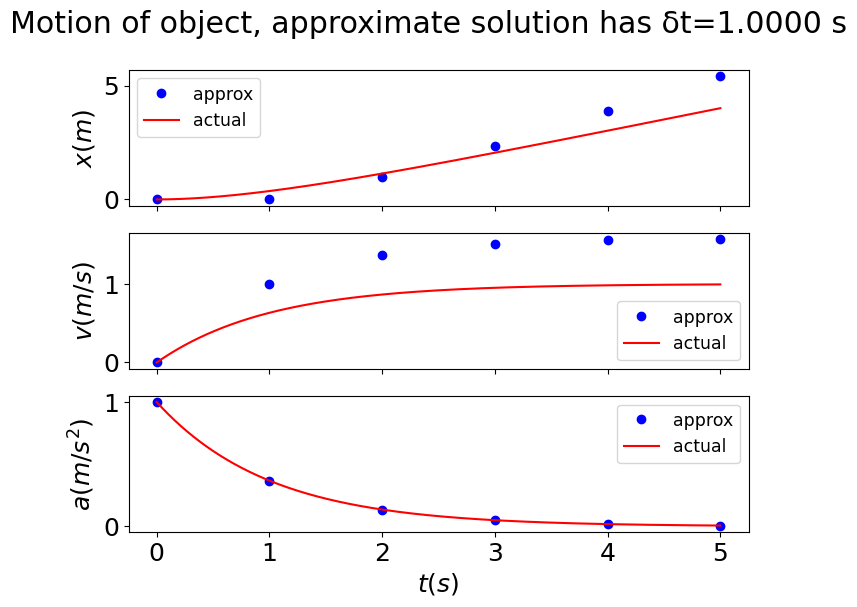

In [2]:
makeTriPlot(0,0,0,5,1)

4. Finally make the following plots from $t=0$ s to $t=5$ s.
    - $x(t)$ vs. $t$
    - $v(t)$ vs. $t$
    - $a(t)$ vs. $t$
  
I've made the following version for you to refer to. I have used $\delta t = 0.001$ s. You should use a time step no larger than $\delta t = 0.02$ s.

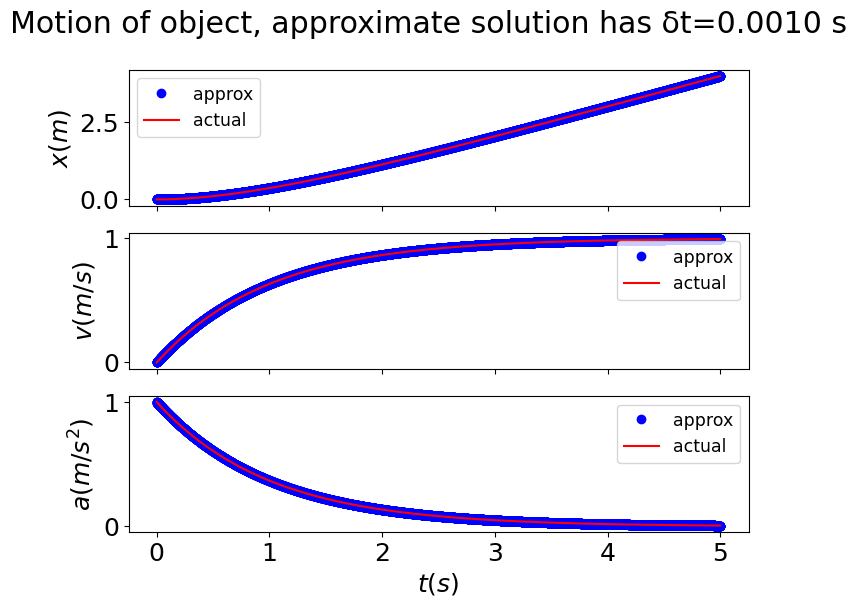

In [3]:
makeTriPlot(0,0,0,5,0.001)

## Appendix: The analytic method for solving this problem:
$$
a(t) = \frac{dv}{dt} = e^{-t} \quad v(0)=0 \quad x(0)=0
$$
### Step 1: Integrate the acceleration to get the velocity
$$
\begin{align*}
v(t) &= \int a(t) dt \\
    &= \int e^{-t} dt \\
    &= -e^{-t} + C_1
\end{align*}
$$
where $C_1$ is an arbitrary constant that is determined by the...

### Step 2: Apply the condition $v(t=0)=0$
$$
0 = -e^0 + C_1 \implies C_1=1
$$
Therefore
$$
v(t) = 1-e^{-t}
$$


### Step 3: Integrate the velocity to find the position
$$
\begin{align*}
    x(t) &= \int v(t) dt \\
        &= \int \left(1-e^{-t}\right) dt \\
        &= t + e^{-t} + C_2
\end{align*}
$$
where $C_2$ is an arbitrary constant that is determined by the...

### Step 4: Apply the condition $x(t=0)=0$
$$
0 = 0 + e^0 + C_2 \implies C_2 = -1
$$
Therefore
$$
x(t) = t - e^{-t} - 1
$$

These functions for $x(t)$ and $v(t)$ are the red lines that I have added to my graphs as the "actual" answer.

## Differential Equations lingo
I don't want you to focus on learning this for this class, but I am attempting to put what you are learning here in a context that will be useful for future coursework so that when it comes up again, it hopefully looks/feels a little familiar.

The equation
$$
a(t) = e^{-t}
$$
can be framed in one of two ways.

1. A 2nd order differential equation (second order because it has a 2nd derivative in it):
$$
\frac{d^2x}{dt^2} = e^{-t}
$$
2. Two, 1st order differential equations:
$$
\frac{dv}{dt} = e^{-t} \quad \frac{dx}{dt} = v(t)
$$

Either way, the system has a *generalized solution* (that is, one where we don't have any initial values or *boundary conditions*). If we want to have a *specific solution*, we need to know the value of the functions $x(t)$ and $v(t)$ for some time value. (It need not be zero, like we had in this example).